In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
B_1 <- read.table("SCENT_1_covariate_B_output/B_1_covariate_output.txt",header=T)

In [3]:
B_2 <- read.table("SCENT_2_covariate_B_output/B_2_covariate_output.txt",header=T)

In [12]:
library(ggvenn)
library(ggplot2)
library(dplyr)

# Function to preprocess data, calculate overlap significance, and visualize results
analyze_peak_overlap <- function(df1, df2, colors = c("indianred2", "dodgerblue2")) {
  # Preprocessing steps
  df1$gene_peak <- paste0(df1$gene, "_", df1$peak)
  df2$gene_peak <- paste0(df2$gene, "_", df2$peak)
  df1$n_covariates <- 1
  df2$n_covariates <- 2

  significant_peaks_df1 <- df1 %>% filter(boot_basic_p < 0.05)
  significant_peaks_df2 <- df2 %>% filter(boot_basic_p < 0.05)

  significant_peaks_group1 <- significant_peaks_df1 %>% pull(gene_peak)
  significant_peaks_group2 <- significant_peaks_df2 %>% pull(gene_peak)

  # Calculate the total number of peaks
  total_peaks <- length(unique(c(df1$gene_peak, df2$gene_peak)))

  # Calculate the number of significant peaks in each group
  group1_peaks <- length(significant_peaks_group1)
  group2_peaks <- length(significant_peaks_group2)

  # Calculate the number of overlapping significant peaks
  overlap_peaks <- length(intersect(significant_peaks_group1, significant_peaks_group2))

  # Perform the chi-squared test for overlap
  overlap_table <- matrix(c(overlap_peaks, group1_peaks - overlap_peaks, group2_peaks - overlap_peaks, total_peaks - group1_peaks - group2_peaks + overlap_peaks), nrow = 2)
  chi_p_value_overlap <- chisq.test(overlap_table)$p.value

  # Create the Venn diagram using ggvenn
  venn_data <- list(Group1 = significant_peaks_group1, Group2 = significant_peaks_group2)
  venn_plot <- ggvenn(venn_data, fill_color = rev(colors), auto_scale = TRUE, stroke_color = "black", stroke_size = 0.5, set_name_size = 2) 

  # Annotate the Venn diagram with the chi-squared test p-value
  venn_plot <- venn_plot +
    annotate("text", x = 0.5, y = 1, label = paste("Chi-squared p =", format(chi_p_value_overlap, scientific = TRUE)), size = 5, color = "black")

  # Density plot of unfiltered p-values
  pvals_df <- bind_rows(df1 %>% mutate(Group = "mito.percentage"), df2 %>% mutate(Group = "log(nUMI) + mito.percentage"))
  density_plot_unfiltered <- ggplot(pvals_df, aes(x = boot_basic_p, fill = Group)) +
    geom_density(alpha = 0.2) +
    scale_fill_manual(values = colors) +
    labs(title = "p-value Distribution", x = "p-value", y = "Density")

  # Perform KS test on unfiltered p-values
  ks_test_unfiltered <- ks.test(df1$boot_basic_p, df2$boot_basic_p)
  density_plot_unfiltered <- density_plot_unfiltered +
    annotate("text", x = 0.5, y = 1.5, label = paste("KS test p =", format(ks_test_unfiltered$p.value, scientific = TRUE)), size = 5, color = "black") + theme_classic()

  # Density plot of significant p-values
  significant_pvals_df <- bind_rows(significant_peaks_df1 %>% mutate(Group = "mito.percentage"), significant_peaks_df2 %>% mutate(Group = "log(nUMI) + mito.percentage"))
  density_plot_significant <- ggplot(significant_pvals_df, aes(x = boot_basic_p, fill = Group)) +
    geom_density(alpha = 0.2) +
    scale_fill_manual(values = colors) +
    labs(title = "p<0.05 distribution", x = "p-value", y = "Density")

  # Perform KS test on significant p-values
  ks_test_significant <- ks.test(significant_peaks_df1$boot_basic_p, significant_peaks_df2$boot_basic_p)
  density_plot_significant <- density_plot_significant +
    annotate("text", x = 0.025, y = 40, label = paste("KS test p =", format(ks_test_significant$p.value, scientific = TRUE)), size = 5, color = "black") +
    xlim(0, 0.05) + theme_classic()

  # Print all plots
  print(density_plot_unfiltered)
  print(venn_plot)
  print(density_plot_significant)
}


Warning message in ks.test.default(df1$boot_basic_p, df2$boot_basic_p):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(significant_peaks_df1$boot_basic_p, significant_peaks_df2$boot_basic_p):
“p-value will be approximate in the presence of ties”


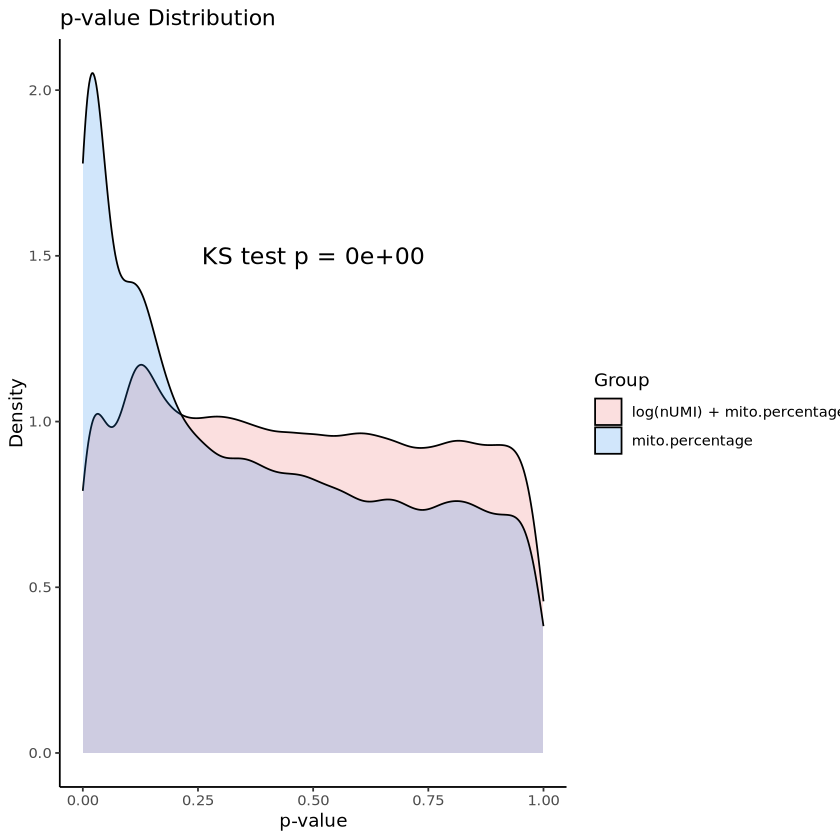

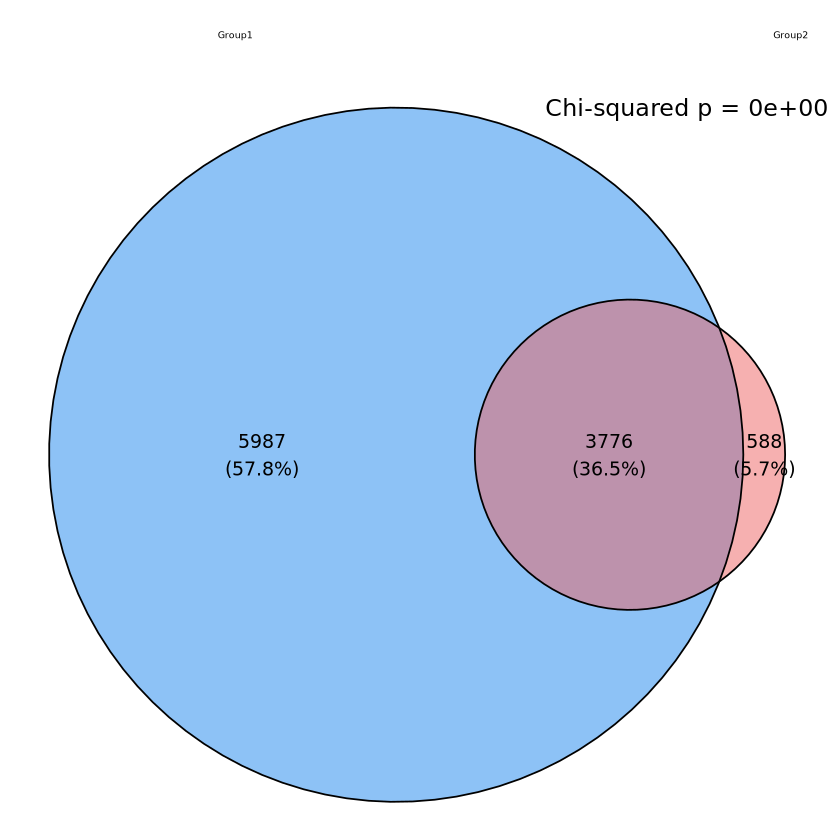

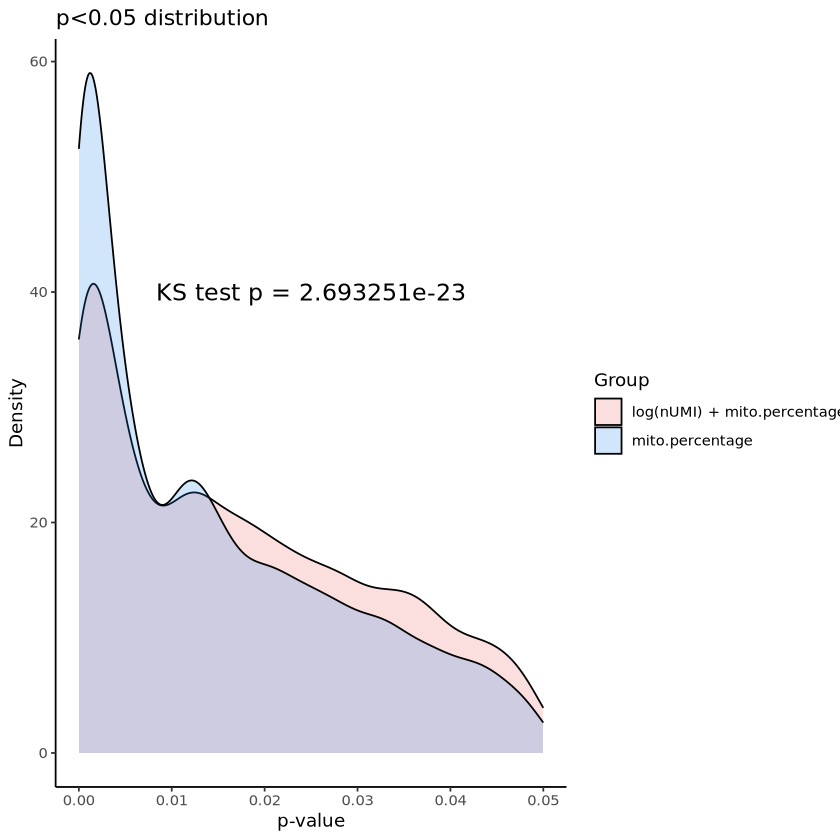

In [13]:
analyze_peak_overlap(B_1,B_2,c("indianred2","dodgerblue2"))

In [8]:
F_1 <- read.table("SCENT_1_covariate_output/fibroblast_1_covariate_output.txt",header=T)
F_2 <- read.table("SCENT_2_covariate_output/fibroblast_2_covariate_output.txt",header=T)

Warning message in ks.test.default(df1$boot_basic_p, df2$boot_basic_p):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(significant_peaks_df1$boot_basic_p, significant_peaks_df2$boot_basic_p):
“p-value will be approximate in the presence of ties”


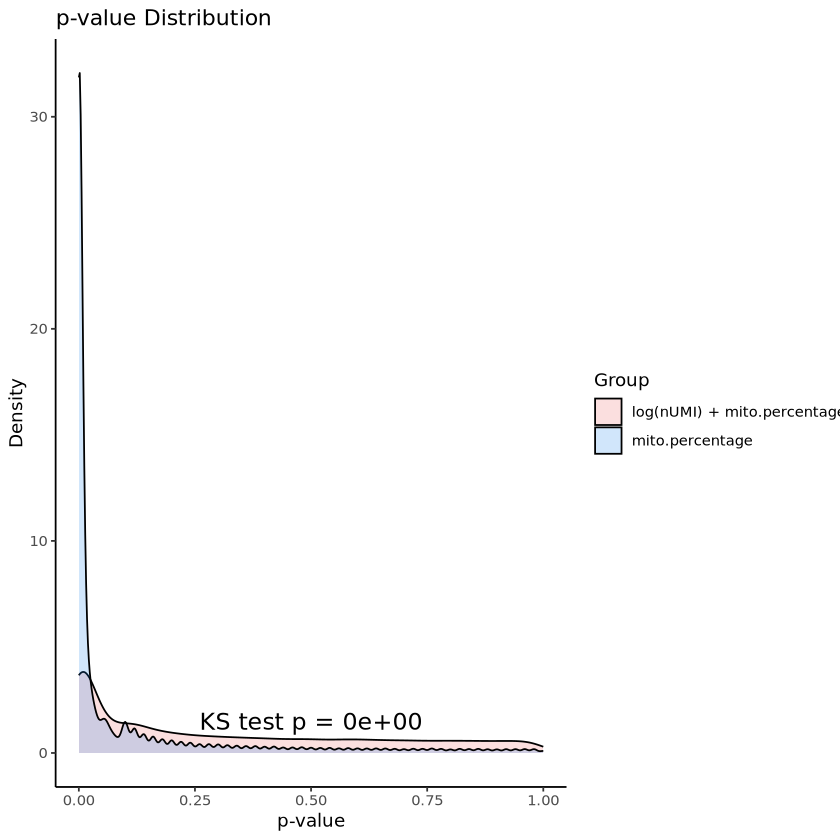

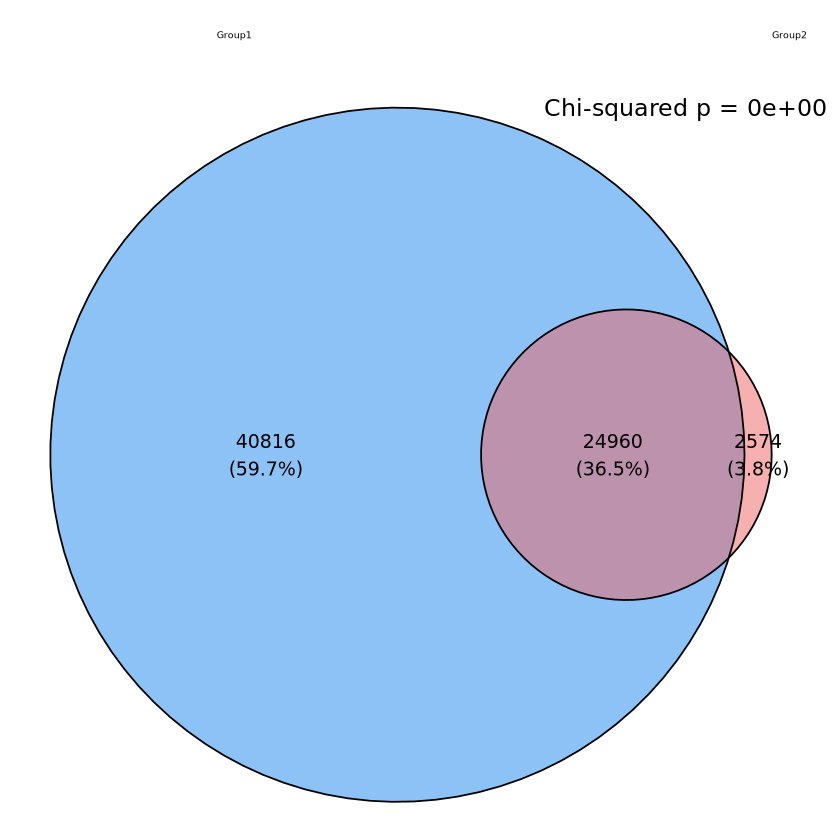

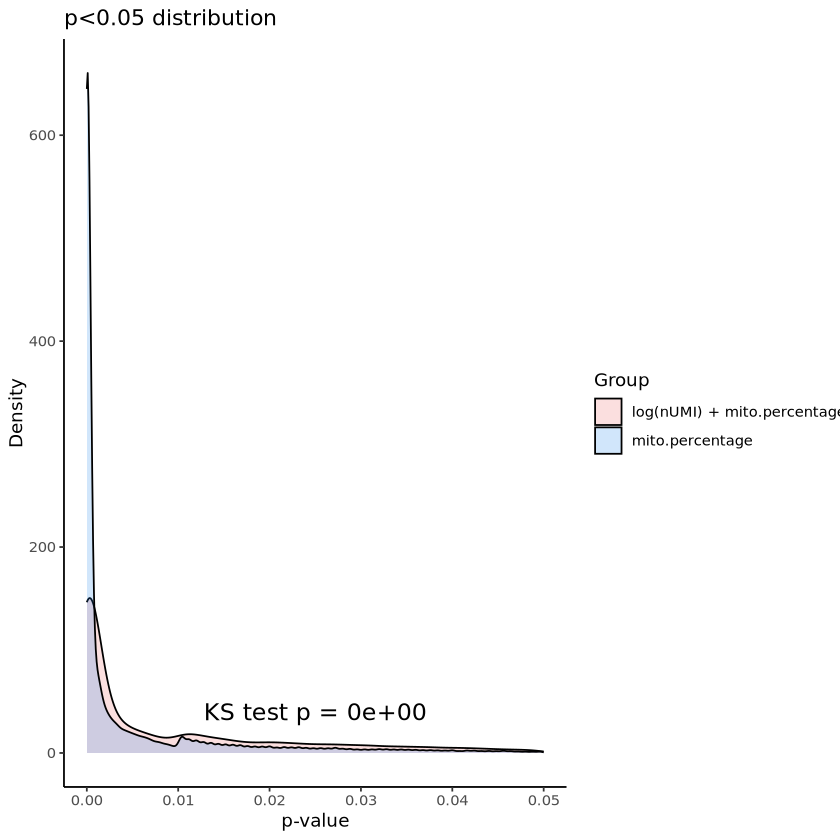

In [14]:
analyze_peak_overlap(F_1,F_2)

In [15]:
T_1 <- read.table("./TCELL_1_covariate_output.txt",header=T)
T_2 <- read.table("./TCELL_2_covariate_output.txt",header=T)

Warning message in ks.test.default(df1$boot_basic_p, df2$boot_basic_p):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(significant_peaks_df1$boot_basic_p, significant_peaks_df2$boot_basic_p):
“p-value will be approximate in the presence of ties”


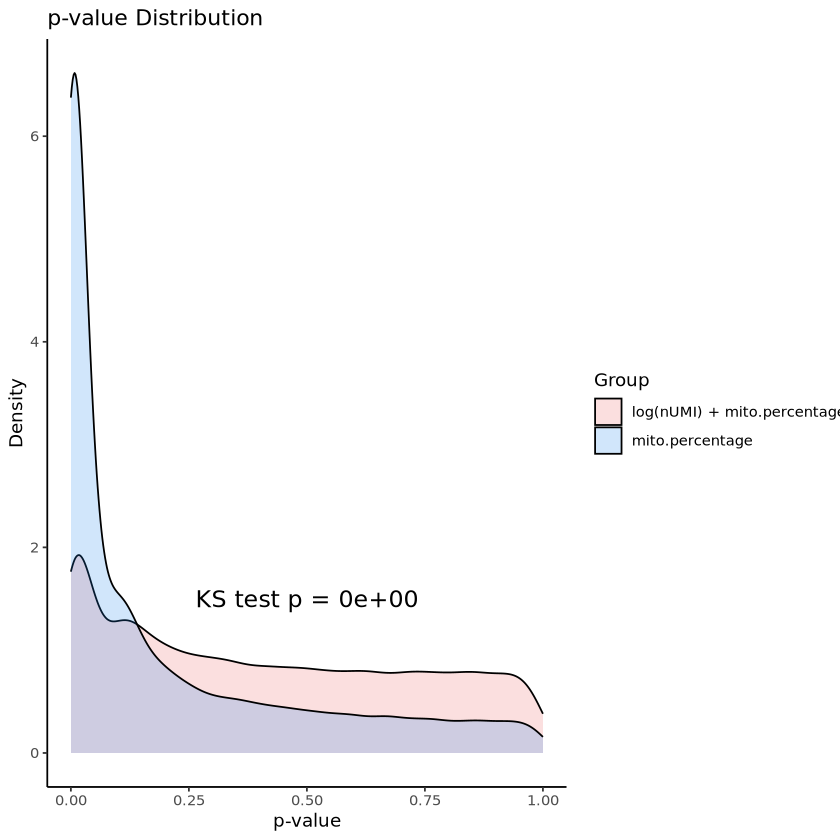

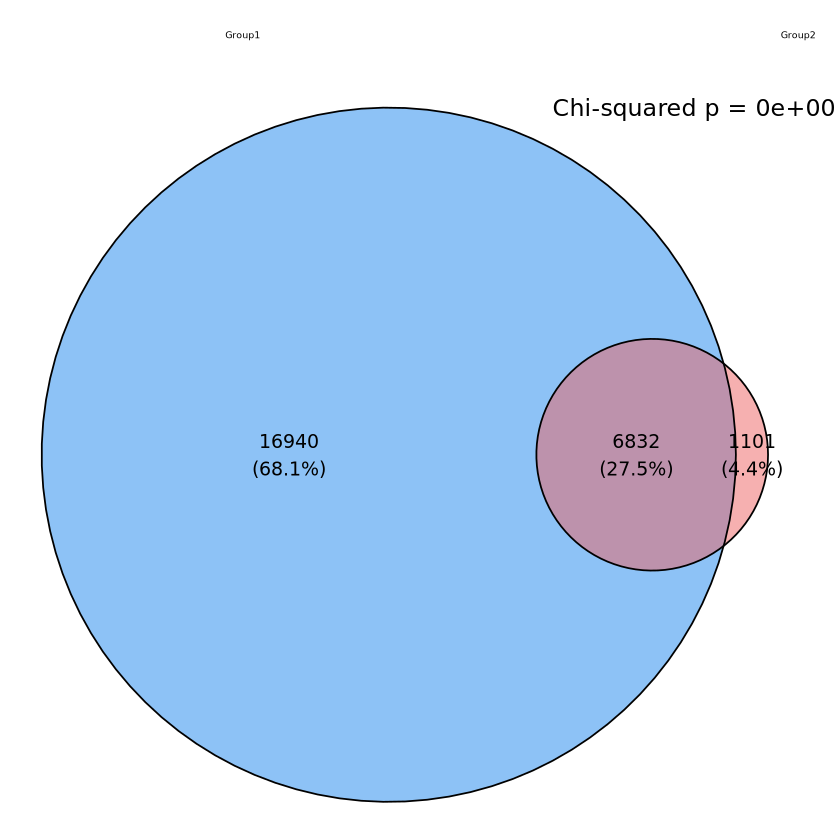

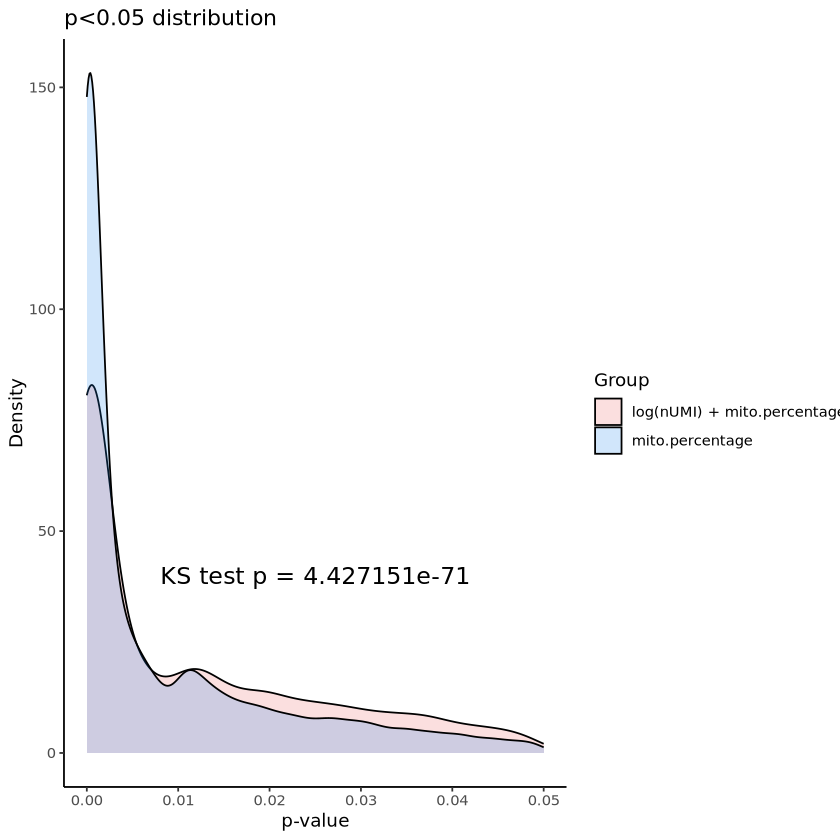

In [16]:
analyze_peak_overlap(T_1,T_2)

In [ ]:

install.packages("ggvenn")
library(ggvenn)
library(ggplot2)
library(dplyr)
B_1$gene_peak <- paste0(B_1$gene,"_",B_1$peak)
B_2$gene_peak <- paste0(B_2$gene,"_",B_2$peak)
significant_peaks_B1 <- B_1 %>% filter(boot_basic_p < 0.05)
significant_peaks_B2 <- B_2 %>% filter(boot_basic_p < 0.05)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [81]:
significant_peaks_group1 <- significant_peaks_B1  %>% pull(gene_peak)
significant_peaks_group2 <- significant_peaks_B2 %>% pull(gene_peak)


In [ ]:

# Create lists of significant peaks for each group

# Calculate the total number of peaks

# Annotate the Venn diagram with the hypergeometric test p-value
grid.text(paste("Hypergeometric Test\np-value =", format(hyper_p_value, scientific = TRUE)), x = 0.5, y = 0.1, gp = gpar(fontsize = 12))



In [ ]:

# Extract the common significant peaks
common_peaks <- intersect(significant_peaks_group1, significant_peaks_group2)
common_peaks_pvalues <- B_p_df %>% filter(peak %in% common_peaks)

# Plot the p-values of the significant overlaps
pvalue_plot <- ggplot(common_peaks_pvalues, aes(x = peak, y = p_value, color = n_covariates)) +
  geom_point() +
  theme_classic() +
  labs(title = "P-values of Significant Overlaps", x = "Peak", y = "P-value") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Display the p-value plot
print(pvalue_plot)